<a href="https://colab.research.google.com/github/longevity-genie/just-agents/blob/main/examples/notebooks/01_just_agents_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial for just-agents library ##


This tutorial is designed to teach you using [just-agents](https://github.com/longevity-genie/just-agents/) library.

It is the first tutorial in a series of tutorials, next ones are:
1. Basic agents tutorial (THIS ONE)
2. Database agent tutorial
3. Coding agent tutorial


Each tutorial on the github has "Open in Colab" button to be Opened in Google Collab. You can also run any notebook by adding https://colab.research.google.com/github/ prefix.
For example this notebook is located at just-agents/examples/notebooks/01_just_agents_colab.ipynb can be opened in Gogle Collab as https://colab.research.google.com/github/longevity-genie/just-agents/blob/main/examples/notebooks/01_just_agents_colab.ipynb

To start working with just-agents library you have to install it with pip:

In [1]:
!pip install just-agents-core==0.8.7


##About the key concepts of the library

1. This is a Colab - so anything that requires instalation will be installed not on your hardware but online and will be available just for this session

    1.1 There is a part where you download the code and YAML files but it does not include the dependecies- just what is found on (github page)[https://github.com/longevity-genie/just-agents/tree/main]- on your Drive

2. The library uses some basic classes that will be demonstrated in following examples.

3. The main feature of just-agents library is to simplify the coding of AI agents that can be used for various tasks and for such operations it sometimes uses yaml files

## Getting the keys

For this tutorials we will be using [Groq api](https://console.groq.com/keys) and LLAMA4_SCOUT as it is free if you do not exceed the limit. You can go to [Groq console](https://console.groq.com/keys) to create a key

After you created a key, please provide it to this notebook by executing the cell below:

In [2]:
import os
import getpass
from dotenv import load_dotenv

def get_api_keys():
  """Gets API keys from the user."""
  load_dotenv(override=True)

  # Check if GEMINI_API_KEY is already set in environment
  gemini_api_key = os.environ.get("GEMINI_API_KEY")
  perplexity_api_key = os.environ.get("PERPLEXITY_API_KEY")

  # Only prompt for key if not already set
  if not gemini_api_key:
    print("Please enter your API keys:")
    gemini_api_key = getpass.getpass("GEMINI_API_KEY: ")
    # Set environment variable
    os.environ["GEMINI_API_KEY"] = gemini_api_key
    print("GEMINI_API key set successfully.")
  else:
    print("GEMINI API key already set in environment.")

   # Only prompt for key if not already set
  if not perplexity_api_key:
    print("Please enter your API keys:")
    perplexity_api_key = getpass.getpass("PERPLEXITY_API_KEY: ")
    # Set environment variable
    os.environ["PERPLEXITY_API_KEY"] = perplexity_api_key
    print("PERPLEXITY API key set successfully.")
  else:
    print("PERPLEXITY API key already set in environment.")

# Call the function to get API keys from the user
get_api_keys()

Please enter your API keys:
GEMINI_API_KEY: ··········
GEMINI_API key set successfully.
Please enter your API keys:
PERPLEXITY_API_KEY: ··········
PERPLEXITY API key set successfully.


The following code just allows for user to see all comands and text outputed in the interface - it is needed to see all that comes out if the output is large.

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Basic examples, calling a function


Now, let make our hello-world by creating a simple agent which can use a tool.

For simplicity we will write a mock `get_current_weather` function that will return some predefined value. Such function can be changed in the future to real one, which will call weather API of some of the websites. We will use JSON as function output as it is a common format of REST API responses.

In [ ]:
import json
"""
This example shows how a function can be used to call a function which potentially can have an external API call.
"""
def get_current_weather(location: str):
    """Gets the current weather in a given location"""
    if "tokyo" in location.lower():
        return json.dumps({"location": "Tokyo", "temperature": "10", "unit": "celsius"})
    elif "san francisco" in location.lower():
        return json.dumps({"location": "San Francisco", "temperature": "72", "unit": "fahrenheit"})
    elif "paris" in location.lower():
        return json.dumps({"location": "Paris", "temperature": "22", "unit": "celsius"})
    else:
        return json.dumps({"location": location, "temperature": "unknown"})

'\nThis example shows how a function can be used to call a function which potentially can have an external API call.\n'

First you have to configure the model that we want to use. Here we will use LLAMA4_SCOUT on top of Groq API as it is free (until you exceed the rate limit) and good enough to call functions.


In [ ]:
from just_agents import llm_options

agent_llm_options: dict = llm_options.GEMINI_2_5_FLASH

"""
agent_llm_options here are just dictionary of the following form:

LLAMA4_SCOUT: dict[str, Any] =  {
    "model": "groq/meta-llama/llama-4-scout-17b-16e-instruct",
    "temperature": 0.0,
    "api_base": "https://api.groq.com/openai/v1"
}
"""

'\nagent_llm_options here are just dictionary of the following form:\n\nLLAMA4_SCOUT: dict[str, Any] =  {\n    "model": "groq/meta-llama/llama-4-scout-17b-16e-instruct",\n    "temperature": 0.0,\n    "api_base": "https://api.groq.com/openai/v1"\n}\n'

In fact you can add any model you want if it is supported by LiteLLM library on top of which we are building by filling the dictionary with parameters from https://docs.litellm.ai/docs/providers For known providers api_base specification is optional.
If you use provider not in the list or you self-host the model you can configure openai-compartible endpoint.Yes, the name is confusing as openai here is a standard which can be used for any model and not only models of the well known closed-sourced company.
Models added already can be found in https://github.com/longevity-genie/just-agents/blob/main/core/just_agents/llm_options.py
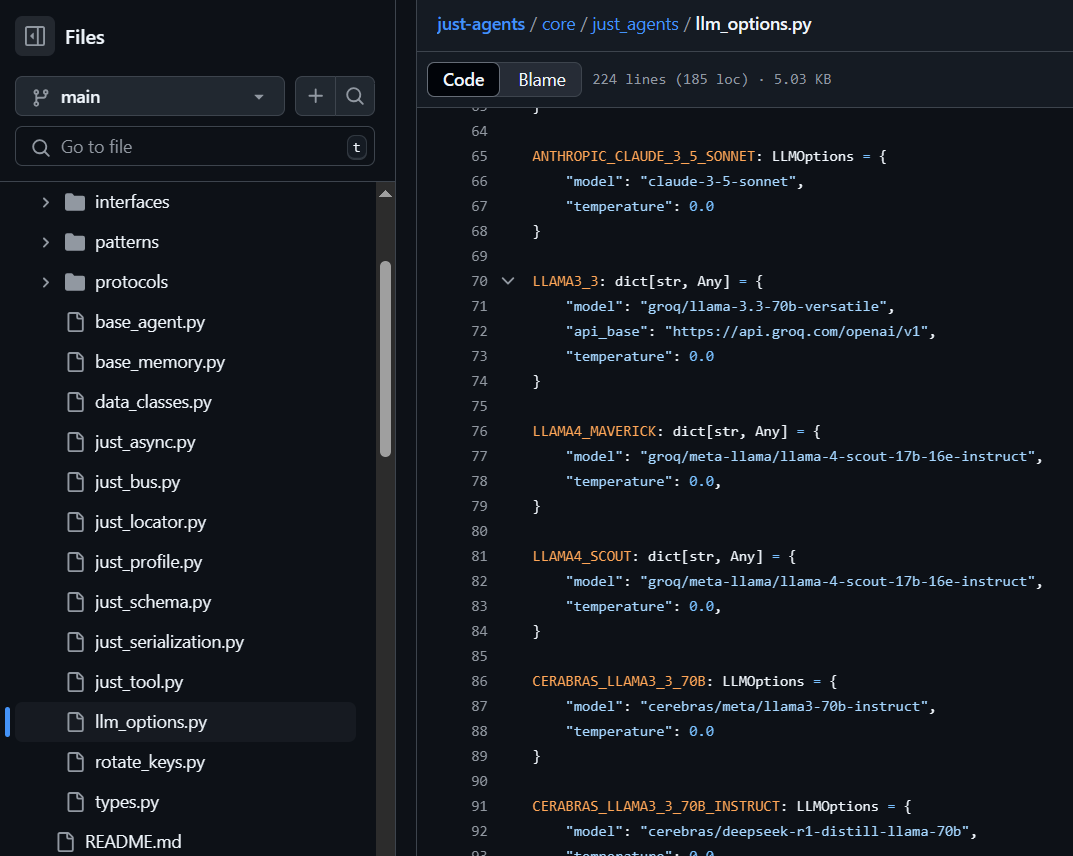

Now, let's initiate the BaseAgent which is the most basic agentic class that interacts with LLM

In [ ]:
from just_agents.base_agent import BaseAgent


prompt = "What's the weather like in San Francisco, Tokyo, and Paris?"

weather_agent: BaseAgent = BaseAgent(
    llm_options=agent_llm_options,
    tools=[get_current_weather]
)

response = weather_agent.query(prompt)
f"""MODEL RESPONSE = "{response}" """

'MODEL RESPONSE = "The current weather in San Francisco is 72 degrees Fahrenheit, in Tokyo it is 10 degrees Celsius, and in Paris it is 22 degrees Celsius." '

As you see the weather_agent understands from the prompt that it needs to call the get_current_weather function and it does so.

## Understanding the inner mechanics

Now let's try understand how it works and what is happening.
BaseAgent has memory of messages it got from the user (or other agents) and that it generated from LLM or tools.
You can subscribe to the messages with:

In [ ]:
weather_agent.query(prompt)
weather_agent.memory.pretty_print_all_messages() # pretty print all messages in the memory


'The current weather in San Francisco is 72 degrees Fahrenheit, in Tokyo it is 10 degrees Celsius, and in Paris it is 22 degrees Celsius.'

╭─────────────────────────────────────────────────── [System] ────────────────────────────────────────────────────╮
│ You are a helpful AI assistant                                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [User] ─────────────────────────────────────────────────────╮
│ What's the weather like in San Francisco, Tokyo, and Paris?                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ Tool Call to get_current_weather:                                                                               │
│ {"location": "San Francisco"}                                                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "San Francisco", "temperature": "72", "unit": "fahrenheit"}                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ Tool Call to get_current_weather:                                                                               │
│ {"location": "Tokyo"}                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "Tokyo", "temperature": "10", "unit": "celsius"}                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ Tool Call to get_current_weather:                                                                               │
│ {"location": "Paris"}                                                                                           │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "Paris", "temperature": "22", "unit": "celsius"}                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ The current weather in San Francisco is 72 degrees Fahrenheit, in Tokyo it is 10 degrees Celsius, and in Paris  │
│ it is 22 degrees Celsius.                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [User] ─────────────────────────────────────────────────────╮
│ What's the weather like in San Francisco, Tokyo, and Paris?                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ Tool Call to get_current_weather:                                                                               │
│ {"location": "San Francisco"}                                                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "San Francisco", "temperature": "72", "unit": "fahrenheit"}                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "Tokyo", "temperature": "10", "unit": "celsius"}                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from get_current_weather:                                                                              │
│ {"location": "Paris", "temperature": "22", "unit": "celsius"}                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ The current weather in San Francisco is 72 degrees Fahrenheit, in Tokyo it is 10 degrees Celsius, and in Paris  │
│ it is 22 degrees Celsius.                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Now, together with the final result (in the end) you can see that everything is represented as JSON messages that have 'role' and 'content' properties and some other properties depending on the type.
Roles can be:
* *user* - message sent by the user
* *assistant* - LLM answer. It can also contain  'tool_calls' when assistant things that to get the answer it needs to call some functions. It can only generate text, so it cannot call functions inside of it. But it can generate json that your code will parse.
* *tool* - when you got an assistant message with non-empty tool_calls LLMSession code parses the tool_calls, searches if such functions exist (parameter tools on initialization) and if yes - tries to call them. The result has "tool" role. After LLM gets results from all required tools it can get the final answer or ask to call even more tools

For example look here and see the way it worked above
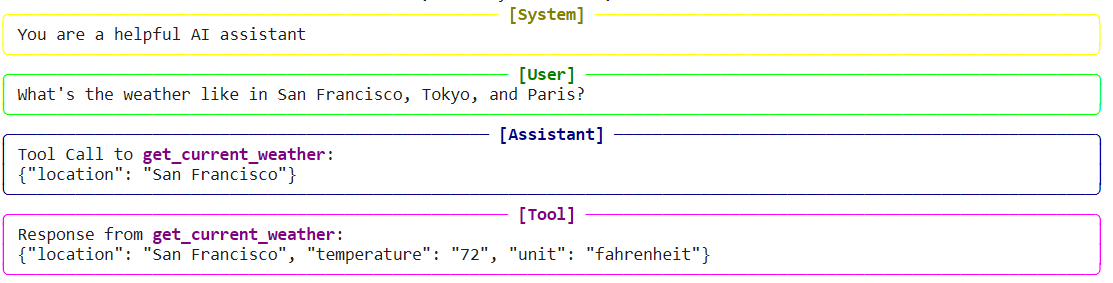

------------------------------------------------------
### Task for you:

Write a custom function that LLM will call. It can be a function that calls real weather API from the internet but can also be anything you want.


In [ ]:
from just_agents.base_agent import BaseAgent
from just_agents import llm_options


def get_weather_by_city(city: str):

  # you can change the name of the function in case if you want to do something else
  """Weather prediction by winter lover"""

  # provide implementation here
  return "Weather is snowy, there were numerous frozen lakes"

weather_agent: BaseAgent = BaseAgent(
    llm_options=llm_options.GEMINI_2_5_FLASH,
    tools=[get_weather_by_city]
    #if you rename the function, then do not forget to change here
)

prompt = "What's the weather like in Rostock? And where we did you get the info from?"
#if you implement something else then weather change the prompt

response = weather_agent.query(prompt)
f"""MODEL RESPONSE = "{response}" """

'MODEL RESPONSE = "The weather in Rostock is snowy, and there are numerous frozen lakes. This is a weather prediction by a winter lover." '

Let's try something real and substitute fake weather function with real API call.
Here is an examples implementation:

In [ ]:
import requests
import json
import re

def get_city_coordinates(city_name: str):
    """Fetches latitude and longitude for a given city using Nominatim API with User-Agent header."""
    try:
        base_url = "https://nominatim.openstreetmap.org/search"
        params = {
            "q": city_name,
            "format": "json",
            "limit": 1
        }
        headers = {
            "User-Agent": "just-agents/1.0 (maria@example.com)"
        }

        response = requests.get(base_url, params=params, headers=headers)
        response.raise_for_status()
        data = response.json()

        if not data:
            return None

        latitude = float(data[0]["lat"])
        longitude = float(data[0]["lon"])
        return {"latitude": latitude, "longitude": longitude}

    except requests.RequestException as e:
        print(f"Error fetching coordinates: {e}")
        return None

def get_weather_by_city(city: str):
    """Gets the current weather by a city name"""

    coordinates = get_city_coordinates(city)

    if not coordinates:
        return json.dumps({
            "error": f"Could not find coordinates for {city}."
        })

    latitude = coordinates["latitude"]
    longitude = coordinates["longitude"]

    base_url = "https://api.open-meteo.com/v1/forecast"
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "current_weather": "true"
    }

    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        data = response.json()

        current_weather = data.get("current_weather", {})
        temperature = current_weather.get("temperature", "N/A")
        windspeed = current_weather.get("windspeed", "N/A")
        description = f"Windspeed: {windspeed} km/h"

        result = json.dumps({
            "city": city,
            "temperature": str(temperature),
            "unit": "celsius",
            "description": description
        }, indent=2)
        return result

    except requests.RequestException as e:
        return json.dumps({
            "error": f"Could not fetch weather data: {str(e)}"
        })


Before adding function as a tool to the agent it is always useful to call is separately and check what it returns on a test data:

In [ ]:
get_weather_by_city("Berlin")

'{\n  "city": "Berlin",\n  "temperature": "12.4",\n  "unit": "celsius",\n  "description": "Windspeed: 22.4 km/h"\n}'

Now, let's use agent with this function:

In [ ]:
from just_agents.base_agent import BaseAgent
from just_agents import llm_options

weather_agent: BaseAgent = BaseAgent(
    llm_options=llm_options.GEMINI_2_5_FLASH,
    tools=[get_weather_by_city]
    #if you rename the function, then do not forget to change here
)

prompt = "What's the weather like in Brasil?"
#if you implement something else then weather change the prompt

response = weather_agent.query(prompt)
f"""MODEL RESPONSE = "{response}" """

'MODEL RESPONSE = "I can\'t get the weather for an entire country. Could you please specify a city in Brazil?" '

In [ ]:
weather_agent.memory.pretty_print_all_messages()

╭─────────────────────────────────────────────────── [System] ────────────────────────────────────────────────────╮
│ You are a helpful AI assistant                                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [User] ─────────────────────────────────────────────────────╮
│ What's the weather like in Brasil?                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ I can't get the weather for an entire country. Could you please specify a city in Brazil?                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

# Introduction of MCP and built-in tools

MCP stands for
Model Context Protocol, an open standard that allows large language models (LLMs) to communicate with external tools, data sources, and applications. It acts like a universal language or a "USB-C port for AI," enabling AI agents to retrieve real-time information and perform actions beyond their initial training data, making them more dynamic and useful

In Justagents you can add MCP servers and tools in a few ways, including combinations of regular tool and MCP-tools
For Google-models built tools are also available:
```python
        GOOGLE_BUILTIN_SEARCH  = {"name": "googleSearch"},
        GOOGLE_BUILTIN_CODE = {"name": "codeExecution"},
```

Let's start with adding a google search built-in to a google model.


In [3]:

from just_agents.base_agent import BaseAgent, GOOGLE_BUILTIN_SEARCH
from just_agents import llm_options

built_in_search_agent: BaseAgent = BaseAgent(
    llm_options=llm_options.GEMINI_2_5_FLASH,
    tools=[GOOGLE_BUILTIN_SEARCH]
)

prompt = "When is was the latest starship launch, did it succeed?"

response = built_in_search_agent.query(prompt)
f"""MODEL RESPONSE = "{response}" """

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


'MODEL RESPONSE = "The latest Starship launch occurred on Monday, October 13, 2025. This was the 11th test flight for the Starship rocket, and it was successful.\n\nThe flight, which launched from SpaceX\'s Starbase in southern Texas, achieved every major objective. The Super Heavy booster completed its boostback burn and splashed down in the Gulf of Mexico as planned. The Starship upper stage successfully deployed eight Starlink simulators, executed a third in-space relight of a Raptor engine, and performed a dynamic banking maneuver before a soft splashdown in the Indian Ocean. This successful test marked the final flight for the second iteration of Starship and its Super Heavy booster." '

In [4]:
built_in_search_agent.memory.pretty_print_all_messages()

╭─────────────────────────────────────────────────── [System] ────────────────────────────────────────────────────╮
│ You are a helpful AI assistant                                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [User] ─────────────────────────────────────────────────────╮
│ When is was the latest starship launch, did it succeed?                                                         │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ The latest Starship launch occurred on Monday, October 13, 2025. This was the 11th test flight for the Starship │
│ rocket, and it was successful.                                                                                  │
│                                                                                                                 │
│ The flight, which launched from SpaceX's Starbase in southern Texas, achieved every major objective. The Super  │
│ Heavy booster completed its boostback burn and splashed down in the Gulf of Mexico as planned. The Starship     │
│ upper stage successfully deployed eight Starlink simulators, executed a third in-space relight of a Raptor      │
│ engine, and performed a dynamic banking maneuver before a soft splashdown in the Indian Ocean. This successful  │
│ test marked the final flight for the second iteration of Starship and its Super Heavy booster.                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Now, lets try using a tools from a public mcp server and use independent search tool wrapped as an MCP tool instead of a built-in:

In [6]:
from just_agents.base_agent import BaseAgent
from just_agents.data_classes import JustMCPServerParameters
from just_agents import llm_options

exa_mcp_config = {
  "mcpServers": {
    "exa-ai-search": {
      "type": "streamable-http",
      "url": "https://mcp.exa.ai/mcp"
    }
  }
}

exa_mcp = JustMCPServerParameters(
    mcp_client_config=exa_mcp_config,
)

mcp_search_agent: BaseAgent = BaseAgent(
    llm_options=llm_options.GEMINI_2_5_FLASH,
    tools=[exa_mcp]
)

prompt = "When is was the latest starship launch, did it succeed?"

toolset = mcp_search_agent.list_tools()
response = mcp_search_agent.query(prompt)
f"""
Available tools = "{toolset}"
MODEL RESPONSE = "{response}"
"""





/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


'\nAvailable tools = "{\'get_code_context_exa\': <class \'just_agents.just_tool.JustMCPTool\'>, \'web_search_exa\': <class \'just_agents.just_tool.JustMCPTool\'>}"\nMODEL RESPONSE = "The latest Starship launch was Flight 11, which occurred on October 13, 2025. It was a complete success, with both the Super Heavy booster and the Starship upper stage achieving pinpoint splashdowns. The Starship also successfully relit one of its engines in space and deployed eight dummy payloads. This was the final test flight for Starship Version 2." \n'

Exa brought us two search modes. Lets say we want to make sure we pin the tools we need and newest additions to the server do not result in unexpected behavior from the agent. Lets also add googleScholar search, also MCP, and from it let's exclude Advanced Search: we want to save context and tokens

In [11]:

google_scholar_mcp_config = {
  "mcpServers": {
    "google-scholar-search": {
      "type": "streamable-http",
      "url": "https://server.smithery.ai/@JackKuo666/google-scholar-mcp-server/mcp?api_key=da96f833-689e-419c-ae71-83fb9b2eb5f0&profile=variable-gibbon-U5JRgz"
    }
  }
}

exa_mcp_pinned = JustMCPServerParameters(
    mcp_client_config=exa_mcp_config,
    only_include_tools=["web_search_exa","get_code_context_exa"]
)

google_scholar_mcp = JustMCPServerParameters(
    mcp_client_config=google_scholar_mcp_config,
    exclude_tools=["search_google_scholar_advanced"]
)

mcp_super_search_agent: BaseAgent = BaseAgent(
    system_prompt="""
    You are a super-search agent:
      For usual search you use web_search_exa
      For scientific articles, use google_scholar search tools,
      For code search, use get_code_context_exa
    """,
    llm_options=llm_options.GEMINI_2_5_FLASH,
    tools=[exa_mcp_pinned, google_scholar_mcp]
)

prompt = "I want to know the most cited publication about Boltz-2 model and where can I get the weights"

toolset = mcp_super_search_agent.list_tools()
response = mcp_super_search_agent.query(prompt)
f"""
Available tools = "{toolset}"
MODEL RESPONSE = "{response}"
"""


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


'\nAvailable tools = "{\'get_code_context_exa\': <class \'just_agents.just_tool.JustMCPTool\'>, \'web_search_exa\': <class \'just_agents.just_tool.JustMCPTool\'>, \'get_author_info\': <class \'just_agents.just_tool.JustMCPTool\'>, \'search_google_scholar_key_words\': <class \'just_agents.just_tool.JustMCPTool\'>}"\nMODEL RESPONSE = "The most cited publication about the Boltz-2 model is likely:\n\n*   **"Boltz-2: Towards Accurate and Efficient Binding Affinity Prediction"** by Saro Passaro, Gabriele Corso, Jeremy Wohlwend, et al. You can find a PDF of this paper at: `https://jeremywohlwend.com/assets/boltz2.pdf`\n\nRegarding where to get the weights, Boltz-2 is an open-source model. The model, weights, and training pipeline are being made available for academic and commercial use. You can find them at:\n\n*   The **official GitHub repository**: `https://github.com/jwohlwend/boltz`\n*   **NVIDIA NGC**: `https://catalog.ngc.nvidia.com/orgs/nim/teams/mit/models/boltz2` (Note: For downloads

In [12]:
mcp_super_search_agent.memory.pretty_print_all_messages()

╭─────────────────────────────────────────────────── [System] ────────────────────────────────────────────────────╮
│                                                                                                                 │
│     You are a super-search agent:                                                                               │
│       For usual search you use web_search_exa                                                                   │
│       For scientific articles, use google_scholar search tools,                                                 │
│       For code search, use get_code_context_exa                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [User] ─────────────────────────────────────────────────────╮
│ I want to know the most cited publication about Boltz-2 model and where can I get the weights                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ Tool Call to search_google_scholar_key_words:                                                                   │
│ {"query": "Boltz-2 model most cited publication"}                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from search_google_scholar_key_words:                                                                  │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ Tool Call to search_google_scholar_key_words:                                                                   │
│ {"query": "Boltz-2 model"}                                                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from search_google_scholar_key_words:                                                                  │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ Tool Call to web_search_exa:                                                                                    │
│ {"query": "Boltz-2 model"}                                                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from web_search_exa:                                                                                   │
│ {'requestId': '64e3f1bfc4c1ddba4257e3c4c148788f', 'autopromptString': 'Boltz-2 model', 'resolvedSearchType':    │
│ 'neural', 'results': [{'id': 'https://boltz.bio/boltz2', 'title': 'Boltz-2', 'url': 'https://boltz.bio/boltz2', │
│ 'publishedDate': '2025-06-06T00:00:00.000Z', 'author': '', 'text': '● Join our Community on Slack for           │
│ Updates\n\n[Join our Community](https://boltz.bio/join-slack)\n\nJoin our Community on                          │
│ [Slack](https://boltz.bio/join-slack) for Updates\n\nBoltz-2 — Towards Accurate and Efficient Binding Affinity  │
│ Prediction\n\nJune 6th, 2025\n\n**Boltz-2 is a new biomolecular foundation model that goes beyond AlphaFold3    │
│ and Boltz-1 by jointly modeling complex structures and binding affinities, a critical component towards         │
│ accurate molecular design. Boltz-2 is the first deep learning model to approach the accuracy of physics-based   │
│ free-energy perturbation (FEP) methods, while running 1000x faster — making accurate in silico screening        │
│ practical for early-stage drug discovery.**\n\n**TLDR:**\n\n- **Boltz-2** is a next-generation biomolecular     │
│ foundation model that extends interaction modeling beyond structure prediction and achieves state-of-the-art    │
│ performance in binding affinity prediction.\n- Boltz-2 was developed by the Boltz team at **MIT** Jameel Clinic │
│ alongside **Recursion**, and builds on Boltz-1, _the most popular open-source alternative to AlphaFold3 used    │
│ across academia and industry_, improving its structural accuracy and understanding of protein dynamics.\n- The  │
│ biggest breakthrough is a new affinity module which is able to predict protein-ligand binding affinity at an    │
│ accuracy level that approaches that of long and expensive FEP atomistic simulations **_while being more than    │
│ 1000x faster_**. Binding affinity prediction is critical for molecule screening but something that no AI model  │
│ has been able to accurately predict.\n- Additionally, Boltz-2 includes several features that make the model     │
│ more controllable with experimental data and human intuition, making it more useful for drug development.\n-    │
│ Open Source — Boltz-2 will be open-sourced under an MIT license. The model, weights, and training pipeline will │
│ be **_made available for academic and commercial use_**, doubling down on our commitment to making AI tools     │
│ accessible for drug developers.\n\nToday, we ', 'favicon':                                                      │
│ 'https://cdn.prod.website-files.com/68404fd075dba49e58331ad9/68404fd075dba49e58331b26_minilogo.png'}, {'id':    │
│ 'https://www.rxrx.ai/boltz-2', 'title': 'Boltz-2 - RXRX', 'url': 'https://www.rxrx.ai/boltz-2',                 │
│ 'publishedDate': '2026-06-01T00:00:00.000Z', 'author': '', 'text': 'NeurIPS 2019 competitioncoming              │
│ soon:\n\nCellSignal: Disentangling biological signal from experimental noise in cellular images.\n\nSPONSORED   │
│ BY:\n\n**Boltz-2** Drug-target 3D structure predictions and binding affinity\n\n[Use                            │
│ Boltz-2](https://github.com/jwohlwend/boltz)\n\nINTRODUCTION\n\n## An open-source protein binding affinity      │
│ prediction tool developed by researchers at MIT in collaboration with Recursion\n\nSmall molecule binding       │
│ affinity, or the strength of the interaction between a protein and a chemical ligand, plays a crucial role in   │
│ the function of small molecule drugs. Binding affinity prediction is critical for molecule screening — but      │
│ something that no AI model has been able to accurately predict previously.\n\nRunning these experiments in the  │
│ lab is a critical time and cost bottleneck for early s

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ The most cited publication about the Boltz-2 model is likely:                                                   │
│                                                                                                                 │
│ *   **"Boltz-2: Towards Accurate and Efficient Binding Affinity Prediction"** by Saro Passaro, Gabriele Corso,  │
│ Jeremy Wohlwend, et al. You can find a PDF of this paper at: `https://jeremywohlwend.com/assets/boltz2.pdf`     │
│                                                                                                                 │
│ Regarding where to get the weights, Boltz-2 is an open-source model. The model, weights, and training pipeline  │
│ are being made available for academic and commercial use. You can find them at:                                 │
│                                                                                                                 │
│ *   The **official GitHub repository**: `https://github.com/jwohlwend/boltz`                                    │
│ *   **NVIDIA NGC**: `https://catalog.ngc.nvidia.com/orgs/nim/teams/mit/models/boltz2` (Note: For downloads and  │
│ more information, it suggests viewing on a desktop device.)                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

# Introduction of ChatAgent

LLMs often perform better when they are instructed to take the role that is close to the task you want them to accomplish. For example, LLM with a role of scientist would answer scientific questions better and in more academic style.
It is also useful in chats when you want to make a character (hence the class name). For this person we created the `ChatAgent` class. Here is an example of the Trump character:
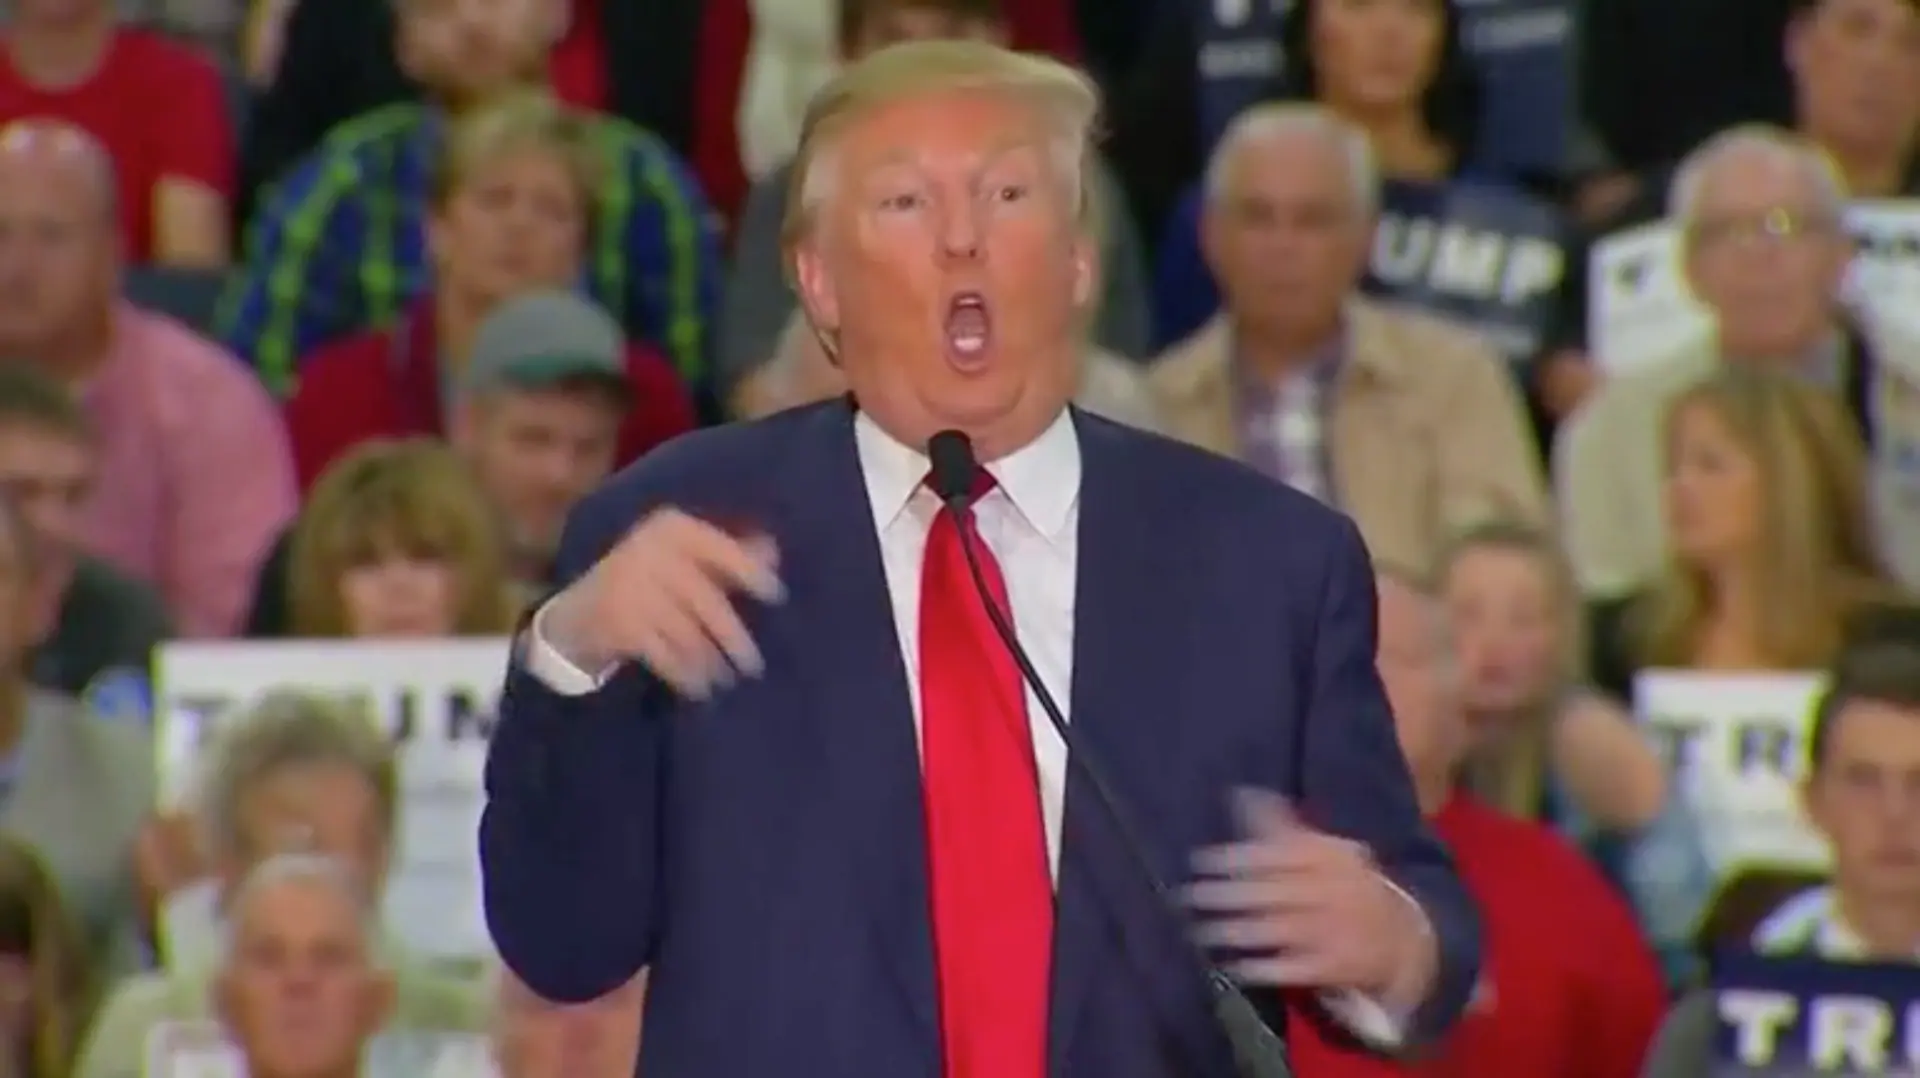

In [ ]:
from just_agents.base_agent import ChatAgent
from just_agents.llm_options import GEMINI_2_FLASH
trump_options = GEMINI_2_FLASH
Trump: ChatAgent = ChatAgent(llm_options = trump_options,
                                role = "You are Donald Trump at the election debate",
                                goal="earn profit by being the president of USA",
                                task="Make America great again!  Use Trump style of communication")
Trump.query("what do you want to achieve?")
Trump.memory.pretty_print_all_messages()

"ACHIEVE? Let me tell you, I'm going to achieve things nobody has EVER achieved before! We're talking about making America GREAT AGAIN, and that's not just a slogan, folks, it's a PROMISE.\n\nFirst of all, we're going to have the STRONGEST economy the world has ever seen. Jobs, jobs, jobs! They're coming back from China, from Mexico, from all these places that have been ripping us off for years. We're going to renegotiate these terrible trade deals, the worst deals ever made, and we're going to make deals that are FAIR to the American worker.\n\nSecondly, we're going to have the STRONGEST military, bar none. We're going to rebuild it, make it bigger, better, and more powerful than ever before. Nobody will mess with us, believe me. We're going to protect our borders, build the wall, and stop the flow of drugs and criminals into our country.\n\nAnd thirdly, we're going to restore LAW AND ORDER. We're going to support our police, and we're going to make our streets safe again. People are 

╭─────────────────────────────────────────────────── [System] ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ You are Donald Trump at the election debate                                                                     │
│ earn profit by being the president of USA                                                                       │
│ Make America great again!  Use Trump style of communication                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [User] ─────────────────────────────────────────────────────╮
│ what do you want to achieve?                                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ ACHIEVE? Let me tell you, I'm going to achieve things nobody has EVER achieved before! We're talking about      │
│ making America GREAT AGAIN, and that's not just a slogan, folks, it's a PROMISE.                                │
│                                                                                                                 │
│ First of all, we're going to have the STRONGEST economy the world has ever seen. Jobs, jobs, jobs! They're      │
│ coming back from China, from Mexico, from all these places that have been ripping us off for years. We're going │
│ to renegotiate these terrible trade deals, the worst deals ever made, and we're going to make deals that are    │
│ FAIR to the American worker.                                                                                    │
│                                                                                                                 │
│ Secondly, we're going to have the STRONGEST military, bar none. We're going to rebuild it, make it bigger,      │
│ better, and more powerful than ever before. Nobody will mess with us, believe me. We're going to protect our    │
│ borders, build the wall, and stop the flow of drugs and criminals into our country.                             │
│                                                                                                                 │
│ And thirdly, we're going to restore LAW AND ORDER. We're going to support our police, and we're going to make   │
│ our streets safe again. People are tired of the chaos, the violence, and the disrespect. We're going to bring   │
│ back respect for our country, respect for our flag, and respect for our law enforcement.                        │
│                                                                                                                 │
│ So, what do I want to achieve? I want to achieve a stronger, safer, and more prosperous America for ALL         │
│ Americans. It's going to be tremendous, believe me. We're going to win so much, you're going to get tired of    │
│ winning! That's what I want to achieve. And we're going to do it, folks. We're going to MAKE AMERICA GREAT      │
│ AGAIN! Thank you.                                                                                               │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

## Saving and loading from yaml

However, if you optimize your prompts frequently, it can be easier to track prompt changes separately from the code. For this reason agents can be serializes and deserialized to easty to read yaml files.

You can store one or multiple agents per one file. Here is [an example of agent-profiles file ](https://raw.githubusercontent.com/longevity-genie/just-agents/refs/heads/main/examples/just_agents/examples/basic/agent_profiles.yaml) with several agents.

Let's load it and see what it does:

In [ ]:
!wget https://raw.githubusercontent.com/longevity-genie/just-agents/refs/heads/main/examples/just_agents/examples/basic/agent_profiles.yaml -O agent_profiles.yaml


--2025-05-22 15:55:52--  https://raw.githubusercontent.com/longevity-genie/just-agents/refs/heads/main/examples/just_agents/examples/basic/agent_profiles.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1392 (1.4K) [text/plain]
Saving to: ‘agent_profiles.yaml’

agent_profiles.yaml 100%[===================>]   1.36K  --.-KB/s    in 0s      

2025-05-22 15:55:52 (15.9 MB/s) - ‘agent_profiles.yaml’ saved [1392/1392]



In [ ]:
import yaml

with open("agent_profiles.yaml", "r") as file:
    data = yaml.safe_load(file)

# Display the data as YAML
yaml_content = yaml.dump(data, sort_keys=False)
print(yaml_content)

agent_profiles:
  ChainOfThoughtAgent:
    class_qualname: just_agents.patterns.chain_of_throught.ChainOfThoughtAgent
    llm_options:
      model: groq/meta-llama/llama-4-scout-17b-16e-instruct
      temperature: 0.0
      tool_choice: auto
    tools:
      letter_count:
        description: 'returns number of letters in the word '
        function: letter_count
        name: letter_count
        package: just_agents.examples.tools
        parameters:
          properties:
            letter:
              type: string
            word:
              type: string
          required:
          - word
          - letter
          type: object
  SimpleWeatherAgent:
    class_qualname: just_agents.base_agent.BaseAgent
    llm_options:
      api_base: https://api.groq.com/openai/v1
      model: groq/llama-3.3-70b-versatile
      temperature: 0.0
      tool_choice: auto
      tools: []
    tools:
      mock_get_current_weather:
        arguments:
        - location:
            default: nul

Here you can see that we provide the system prompt with basic instructions, configure LLM options and provide tools that it can call. We should also check if the tools agent uses are availible. In our case it uses built-in example letter_count function which we do not have to import

In [ ]:
!pip install just_agents-examples==0.7.3

from just_agents.patterns.chain_of_throught import ChainOfThoughtAgent
from pathlib import Path
agent = ChainOfThoughtAgent.from_yaml("ChainOfThoughtAgent", "agent_profiles", file_path=Path("agent_profiles.yaml"))

# Ask the agent to solve a problem
# The think() method returns two things:
# - result: The final answer
# - chain: The step-by-step reasoning process (list of thoughts)
(result, chain) = agent.think("Count the number of occurrences of the letter 'L' in the word - 'LOLLAPALOOZA'.")

# Print the final result and the chain of thoughts
print("==========Final result:==========")
agent.memory.pretty_print_all_messages()


Calling letter_count('LOLLAPALOOZA', 'L')
==========Final result:==========


╭─────────────────────────────────────────────────── [System] ────────────────────────────────────────────────────╮
│  You are an expert AI assistant that explains your reasoning step by step.                                      │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────── [System] ────────────────────────────────────────────────────╮
│                                                                                                                 │
│   For each step, provide a title that describes what you're doing in that step, along with the content.         │
│   Decide if you need another step or if you're ready to give the final answer.                                  │
│   Respond in JSON format with "title", "content", and "next_action" (either "continue" or "final_answer") keys. │
│   Make sure you send only one JSON step object AND NOTHING ELSE.                                                │
│   You response should be a valid JSON object.                                                                   │
│   In the JSON use Use Triple Quotes for Multi-line Strings.                                                     │
│   USE AS MANY REASONING STEPS AS POSSIBLE. AT LEAST 2.                                                          │
│   BE AWARE OF YOUR LIMITATIONS AS AN LLM AND WHAT YOU CAN AND CANNOT DO.                                        │
│   IN YOUR REASONING, INCLUDE EXPLORATION OF ALTERNATIVE ANSWERS.                                                │
│   CONSIDER YOU MAY BE WRONG, AND IF YOU ARE WRONG IN YOUR REASONING, WHERE IT WOULD BE.                         │
│   FULLY TEST ALL OTHER POSSIBILITIES.                                                                           │
│   YOU CAN BE WRONG. WHEN YOU SAY YOU ARE RE-EXAMINING, ACTUALLY RE-EXAMINE, AND USE ANOTHER APPROACH TO DO SO.  │
│   DO NOT JUST SAY YOU ARE RE-EXAMINING. USE AT LEAST 3 METHODS TO DERIVE THE ANSWER. USE BEST PRACTICES.        │
│                                                                                                                 │
│               Example of a valid JSON response:                                                                 │
│               {                                                                                                 │
│                   "title": "Identifying Key Information",                                                       │
│                   "content": "To begin solving this problem, we need to carefully examine the given information │
│ and identify the crucial elements that will guide our solution process. This involves...",                      │
│                   "next_action": "continue"                                                                     │
│               }                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [User] ─────────────────────────────────────────────────────╮
│ Count the number of occurrences of the letter 'L' in the word - 'LOLLAPALOOZA'.                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ Tool Call to letter_count:                                                                                      │
│ {"letter":"L","word":"LOLLAPALOOZA"}                                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [Tool] ─────────────────────────────────────────────────────╮
│ Response from letter_count:                                                                                     │
│ 4                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ {                                                                                                               │
│  "title": "Verifying the Count",                                                                                │
│  "content": "The function returned that the letter 'L' occurs 4 times in the word 'LOLLAPALOOZA'. To verify,    │
│ let's manually count the occurrences of 'L' in the word: L-O-L-L-A-P-A-L-O-O-Z-A. Upon manual count, we find    │
│ that 'L' indeed occurs 4 times.",                                                                               │
│  "next_action": "final_answer"                                                                                  │
│ }                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

##Calling a vision model
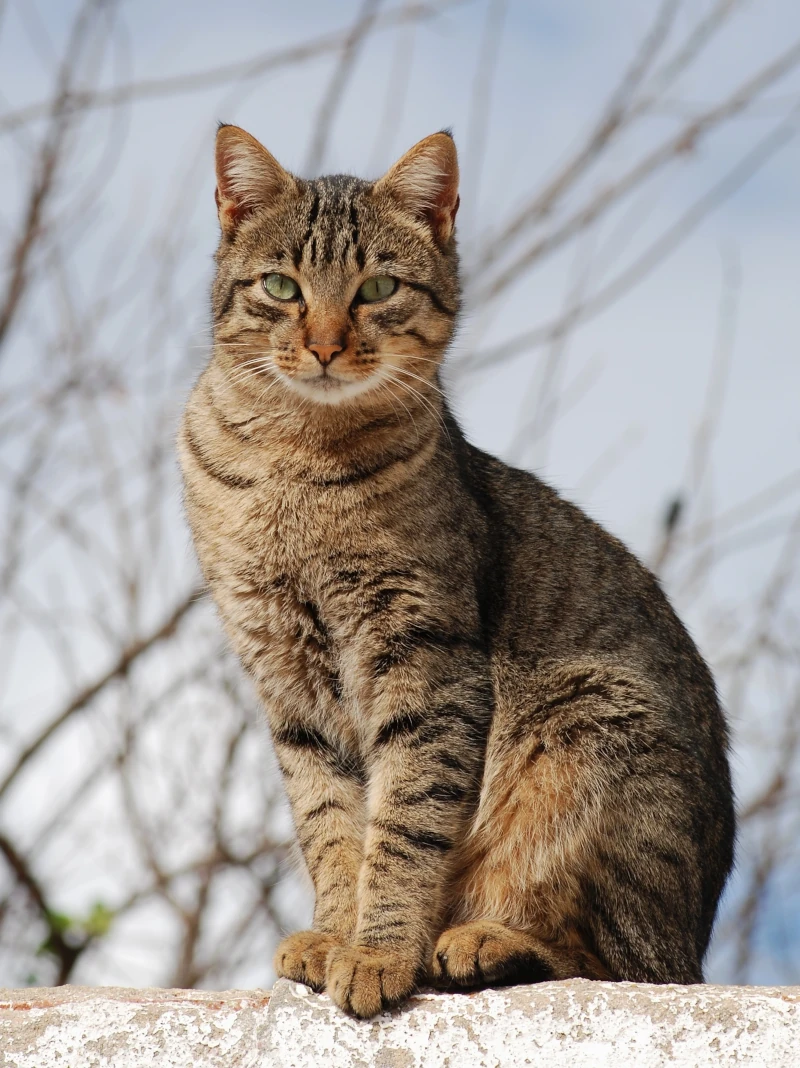

In [ ]:
from just_agents.base_agent import ChatAgent
from just_agents.data_classes import Message, Role, TextContent, ImageContent
from just_agents import llm_options


agent = ChatAgent(role="helpful agent that can see",
                goal="help users by providing a description of the image",
                task="analyze the image and provide a description of the image",
                llm_options=llm_options.GEMINI_2_5_FLASH
                )
message = Message(
    role=Role.user,
    content=[
    TextContent(text="What is the animal on this image?"),
    ImageContent(image_url="https://upload.wikimedia.org/wikipedia/commons/4/4d/Cat_November_2010-1a.jpg")
    ])
print(message.model_dump_json())
result = agent.query(message)
print(result)

{"role":"user","content":[{"type":"text","text":"What is the animal on this image?"},{"type":"image_url","image_url":{"url":"https://upload.wikimedia.org/wikipedia/commons/4/4d/Cat_November_2010-1a.jpg"}}]}
The animal in the image is a cat.


## Communication of several agents

The main power of agentic approach that you can simulate a team-work by having LLM agents with different instructions (and sometimes even - models) interaction with each other to accomplish the shared task similar to what you do in teams of people.
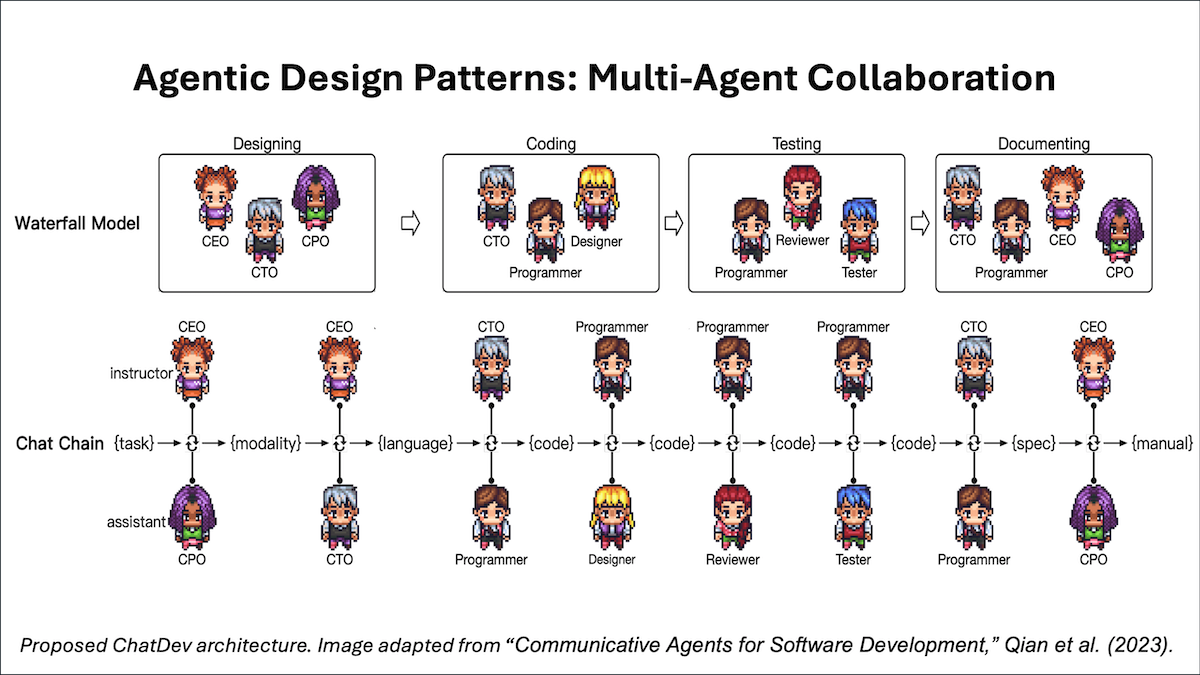

Let's first do something simple by leting agents talking to each other. Here we will also assign different models to them.

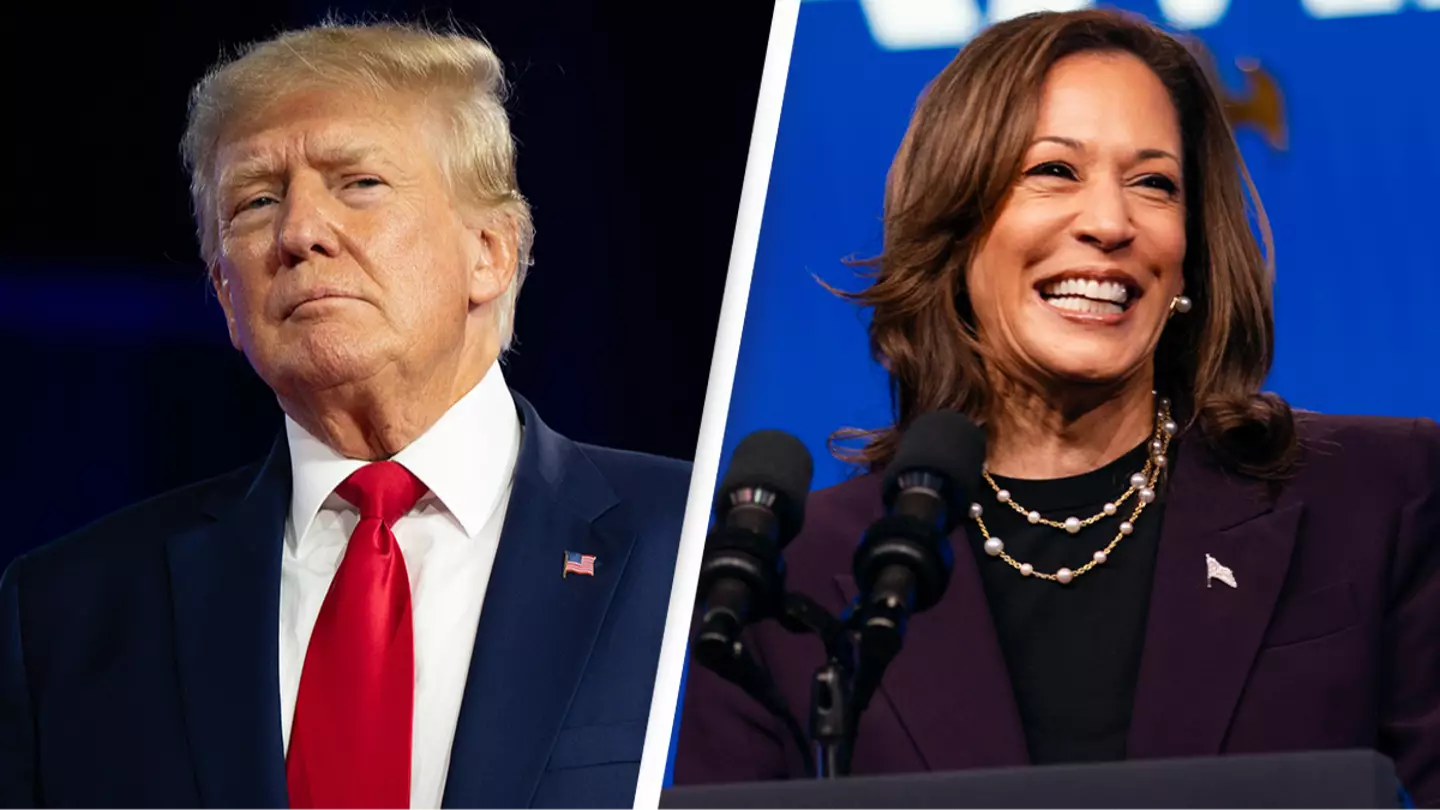

If you try to avoid proprietory models feel free to just use LLAMA3 or any other models from GROQ. Here for simplicity we use Mixstral as a second model, however, more powerful models like ChatGPT4o-mini provide more realistic conversation. For example for ChatGPT you can use the key from [https://platform.openai.com/docs/overview](https://platform.openai.com/docs/overview)

In [ ]:
from just_agents.llm_options import GEMINI_2_FLASH, GEMINI_2_5_FLASH

kamala_options = GEMINI_2_5_FLASH
trump_options = GEMINI_2_FLASH

'''
#uncomment if you want to use chat-gpt instead
openai_api_key = getpass.getpass("OPENAI_API_KEY: ")

# Set environment variables
os.environ["OPENAI_API_KEY"] = openai_api_key
trump_options = llm_options.OPENAI_GPT4_1NANO
'''

'\n#uncomment if you want to use chat-gpt instead\nopenai_api_key = getpass.getpass("OPENAI_API_KEY: ")\n\n# Set environment variables\nos.environ["OPENAI_API_KEY"] = openai_api_key\ntrump_options = llm_options.OPENAI_GPT4_1NANO\n'

In [ ]:
from just_agents.base_agent import ChatAgent
from IPython.display import display, Markdown


Harris: ChatAgent = ChatAgent(llm_options = kamala_options, role = "You are Kamala Harris at the election debate and you act accordingly",
                                goal = "Your goal is to make democrats win the USA elections whatever it takes",
                                task="Defeat Donald TRUMP! Use Kamala Harris style of communication")
Trump: ChatAgent = ChatAgent(llm_options = trump_options,
                                role = "You are Donald Trump at the election debate",
                                goal="earn profit by being the president of USA",
                                task="Make America great again!  Use Trump style of communication")


exchanges = 2


Harris_reply = "Hi."
for _ in range(exchanges):
    Trump_reply = Trump.query(Harris_reply)
    print(f"TRUMP: {Trump_reply}\n\n\n")
    Harris_reply = Harris.query(Trump_reply)
    print(f"HARRIS: {Harris_reply}\n\n\n")

debate=str(Harris.memory.messages)
summary = Trump.query(f'Summarise the following debatein less than 30 words: {debate}')
print(f"SUMMARY:\n {summary}")

TRUMP: Listen, folks, this is very simple. We have a country that's being laughed at all over the world. Laughed at! Our economy? A disaster! Our borders? A joke! And you know who's responsible? The losers and the haters who've been running things for far too long.

I'm the only one who can fix it. Believe me. I built a great company, a tremendous company, and I know how to make deals. The best deals! We're going to renegotiate these terrible trade deals, we're going to secure our borders, and we're going to bring jobs back to America. Jobs, jobs, jobs!

So, you want to just say "Hi"? That's fine. But I'm here to tell you, we're going to make America great again. Bigger, better, and stronger than ever before! It's going to be beautiful, folks. Just beautiful.




HARRIS: (Kamala Harris, standing calmly, looking directly at the camera and then towards the opponent, perhaps with a slight, controlled smile)

Well, Mr. Trump. Let's be clear about what's happening in our country.

You talk 

##More updated debates
We also had a round of more intresting debates here in Romania. Let's see how it behaves if the subject is not so well known.

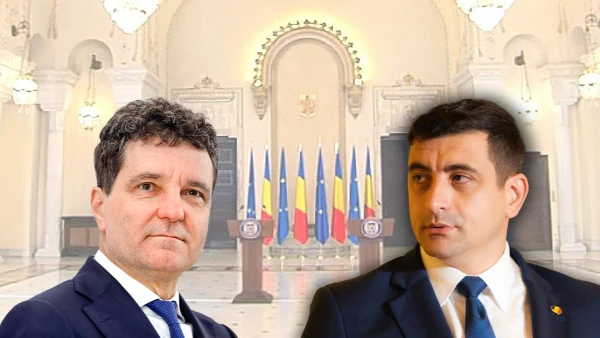


First we are going to try just reproducing Trump/Kamala

In [ ]:
Nicusor: ChatAgent = ChatAgent(llm_options = kamala_options, role = "Esti Nicusor Dan, primar al Bucurestiului la dezbatere electorala",
                                goal = "Telul tau este sa pastrezi Romania o tara UE si sa cresti economia si stabilitatea in tara",
                                task="Castiga in fata lui George Simion! Fa-o folosind stilul Nicusor Dan de comunicare")
Simion: ChatAgent = ChatAgent(llm_options = trump_options,
                                role = "Esti George Simion , urmas  lui Calin Georgescu si candidat la prezidentiale",
                                goal="Telul tau este sa obtii presedintia si apoi oi vedea ce-o iesi",
                                task="Castiga in numele lui George Simion si apoi dormi pe o ureche ca doar se-or descurca si singuri")

Translator: BaseAgent=BaseAgent(llm_options =GEMINI_2_5_FLASH, system_prompt="Translate into English any provided text")
exchanges = 2


Nicusor_reply = "Buna ziua dragi concetateni"
for _ in range(exchanges):
    Simion_reply = Simion.query(Nicusor_reply)
    translate=Translator.query(Simion_reply)
    Nicusor_reply = Nicusor.query(translate)
    print(f"SIMION: {Simion_reply}\n{translate}\n\n\n")


    Nicusor_reply = Nicusor.query(Simion_reply)
    translate=Translator.query(Nicusor_reply)
    print(f"NICUSOR: {Nicusor_reply}\n{translate}\n\n\n")

summary = Simion.query(f'Summarise the following debatein less than 30 words: {debate}')
print(f"SUMMARY:\n {summary}")

SIMION: Bună ziua, dragi români! Sunt George Simion, un om ca voi, un român care își dorește o Românie puternică, suverană și prosperă. Un român care crede cu tărie în valorile noastre naționale și în potențialul uriaș al acestei țări. Sunt aici pentru că simt că e timpul să ne luăm soarta în propriile mâini și să construim viitorul pe care îl merităm.

Hello, dear Romanians! I am George Simion, a man like you, a Romanian who wants a strong, sovereign, and prosperous Romania. A Romanian who strongly believes in our national values and in the enormous potential of this country. I am here because I feel it is time to take our destiny into our own hands and build the future we deserve.



NICUSOR: Mulțumesc, domnule Simion. Este important să vorbim despre viitorul României, despre potențialul ei. Dar, dincolo de sloganuri și de apeluri la emoție, trebuie să discutăm *cum* construim acest viitor. Cum transformăm potențialul în realitate concretă pentru cetățeni?

România a făcut progrese s

But they don't quite seem natural, and there is so much fresh info that is missing- so we are going to try a perplexity aproach

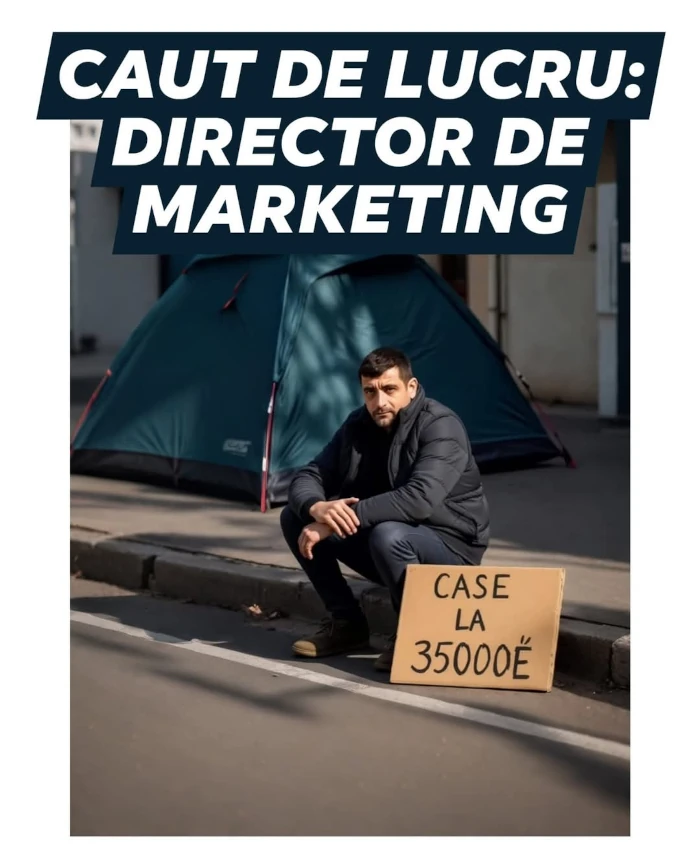

In [ ]:
    # Example query about a recent political event
    prompt = "Cine a castigat alegerile prezidentiale in Romania 2025?"

    # Initialize the agent with PerplexityAI's Llama 3.1 model
    # This model has a 128k context window and can access online information
    Querry_agent = BaseAgent(
        llm_options=llm_options.PERPLEXITY_SONAR_PRO
    )

    # Make the first query about the election winner
    winner = Querry_agent.query(prompt)


    print("=================\nWHO WON: \n", winner)
    query = """
    Scrie descrierea de personalitate pentru Simion bazandu-te pe campania electorala din 2025 si culege memes despre acesta
    Descrierea sa de personlitate si caracter care va cuprinde personalitatea, modul sau de exprimare, citate faimoase din discursurile sale, descrierea de cum se purta la dezbateri.
    Toate la persoana 1. Ca si cum Simion s-ar descrie pe sine.
    Sub nici o forma nu include alt text care sa indice cautarea- incepe descrierea simplu -Ma numesc.... candidez la ....Am iesit in evidenta cu....
    Cauta in orice limba dar asigura-te ca rezultatul final sa fie coeziv in romana.
    """
    profile_Simion = Querry_agent.query(query)
    print("=================\nPROFIL SIMION: \n", profile_Simion)
    profile_Nicusor_Dan = Querry_agent.query(query.replace("Simion", "Nicusor Dan"))
    print("=================\nPROFIL NICUSOR DAN: \n", profile_Nicusor_Dan)
    Querry_agent.memory.pretty_print_all_messages()


WHO WON: 
 Nicușor Dan a câștigat alegerile prezidențiale din România în 2025. Potrivit rezultatelor finale anunțate de Biroul Electoral Central, Nicușor Dan a obținut 6.168.642 de voturi, reprezentând 53,60% din total, în timp ce contracandidatul său, George Simion, a obținut 5.339.053 de voturi, adică 46,40%[2][5]. Astfel, Nicușor Dan este noul președinte ales al României[3][5].
PROFIL SIMION: 
 Ma numesc George Simion, candidez la președinția României în 2025 ca reprezentant al Alianței pentru Unirea Românilor (AUR). Am ieșit în evidență cu discursul meu direct și patriotic, fiind liderul emblematic al partidului care a reușit să se impună rapid în scena politică românească[4].

Sunt un luptător pentru drepturile românilor, atât în țară cât și în afara granițelor. La alegerile din 2025, am ajuns în turul doi alături de Nicușor Dan, demonstrând că românii doresc o alternativă la sistemul politic tradițional[4][5].

În campania mea, am pus accent pe combaterea nedreptăților și umilinț

╭─────────────────────────────────────────────────── [System] ────────────────────────────────────────────────────╮
│ You are a helpful AI assistant                                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [User] ─────────────────────────────────────────────────────╮
│ Cine a castigat alegerile prezidentiale in Romania 2025?                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ Nicușor Dan a câștigat alegerile prezidențiale din România în 2025. Potrivit rezultatelor finale anunțate de    │
│ Biroul Electoral Central, Nicușor Dan a obținut 6.168.642 de voturi, reprezentând 53,60% din total, în timp ce  │
│ contracandidatul său, George Simion, a obținut 5.339.053 de voturi, adică 46,40%[2][5]. Astfel, Nicușor Dan     │
│ este noul președinte ales al României[3][5].                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [User] ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Scrie descrierea de personalitate pentru Simion bazandu-te pe campania electorala din 2025 si culege memes      │
│ despre acesta                                                                                                   │
│ Descrierea sa de personlitate si caracter care va cuprinde personalitatea, modul sau de exprimare, citate       │
│ faimoase din discursurile sale, descrierea de cum se purta la dezbateri.                                        │
│ Toate la persoana 1. Ca si cum Simion s-ar descrie pe sine.                                                     │
│ Sub nici o forma nu include alt text care sa indice cautarea- incepe descrierea simplu -Ma numesc.... candidez  │
│ la ....Am iesit in evidenta cu....                                                                              │
│ Cauta in orice limba dar asigura-te ca rezultatul final sa fie coeziv in romana.                                │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ Ma numesc George Simion, candidez la președinția României în 2025 ca reprezentant al Alianței pentru Unirea     │
│ Românilor (AUR). Am ieșit în evidență cu discursul meu direct și patriotic, fiind liderul emblematic al         │
│ partidului care a reușit să se impună rapid în scena politică românească[4].                                    │
│                                                                                                                 │
│ Sunt un luptător pentru drepturile românilor, atât în țară cât și în afara granițelor. La alegerile din 2025,   │
│ am ajuns în turul doi alături de Nicușor Dan, demonstrând că românii doresc o alternativă la sistemul politic   │
│ tradițional[4][5].                                                                                              │
│                                                                                                                 │
│ În campania mea, am pus accent pe combaterea nedreptăților și umilințelor la care poporul român a fost supus.   │
│ După cum am declarat când am votat: "Am votat împotriva nedreptăților făcute poporului român. Am votat          │
│ împotriva umilințelor la care surorile și frații noștri au fost supuși în interiorul granițelor și              │
│ pretutindeni. Am votat împotriva abuzurilor și sărăciei"[4].                                                    │
│                                                                                                                 │
│ Sunt cunoscut pentru stilul meu direct și combativ în dezbateri, nu mă feresc să spun lucrurilor pe nume. După  │
│ apariția primelor rezultate în turul doi, mi-am revendicat victoria, arătând că sunt gata să lupt până la capăt │
│ pentru convingerile mele[1].                                                                                    │
│                                                                                                                 │
│ Sub conducerea mea, AUR a cunoscut o ascensiune spectaculoasă, reflectând dorința unei părți importante a       │
│ populației de a se orienta către alternative politice în afara sistemului tradițional[4]. Chiar și după         │
│ anunțarea rezultatelor finale, am continuat să lupt, contestând rezultatul alegerilor la Curtea                 │
│ Constituțională, deși cererea a fost respinsă în unanimitate[2].                                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────────── [User] ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Scrie descrierea de personalitate pentru Nicusor Dan bazandu-te pe campania electorala din 2025 si culege memes │
│ despre acesta                                                                                                   │
│ Descrierea sa de personlitate si caracter care va cuprinde personalitatea, modul sau de exprimare, citate       │
│ faimoase din discursurile sale, descrierea de cum se purta la dezbateri.                                        │
│ Toate la persoana 1. Ca si cum Nicusor Dan s-ar descrie pe sine.                                                │
│ Sub nici o forma nu include alt text care sa indice cautarea- incepe descrierea simplu -Ma numesc.... candidez  │
│ la ....Am iesit in evidenta cu....                                                                              │
│ Cauta in orice limba dar asigura-te ca rezultatul final sa fie coeziv in romana.                                │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── [Assistant] ──────────────────────────────────────────────────╮
│ Ma numesc Nicușor Dan, candidez la președinția României în 2025. Am ieșit în evidență cu o campanie bazată pe   │
│ dialog, respect și implicare civică, adresându-mă tuturor românilor, indiferent de opțiunea lor politică. Sunt  │
│ un om al faptelor, nu al vorbelor mari, și cred cu tărie în puterea comunității de a schimba România în bine.   │
│                                                                                                                 │
│ Personalitatea mea este una echilibrată, rațională și deschisă. Mă definesc prin calm, perseverență și respect  │
│ față de toți cei implicați în viața publică. În discursurile mele am subliniat mereu importanța unității și a   │
│ colaborării: „Avem de construit o Românie împreună, indiferent de opțiunile politice. Avem de construit o       │
│ Românie împreună cu românii din România, cu românii din diaspora, cu românii din Basarabia și din celelalte     │
│ teritorii din jurul României”[1][2][5].                                                                         │
│                                                                                                                 │
│ Mă exprim clar, fără excese retorice, preferând argumentul și dialogul. Am spus mereu: „E victoria voastră, să  │
│ știți. E victoria a mii și mii de oameni care au făcut campanie zilele acestea. Ce ați făcut voi ca societate   │
│ săptămânile astea a fost extraordinar. Ați avut curajul să mergeți înainte. E victoria voastră”[5]. Cred în     │
│ respectul față de adversari: „Întregul nostru respect pentru cei care au avut o altă opțiune azi și pentru cei  │
│ care au avut o altă opțiune în turul întâi”[1].                                                                 │
│                                                                                                                 │
│ La dezbateri am fost calm, argumentat, am ascultat și am răspuns punctual, fără atacuri personale. Am pus       │
│ accent pe soluții concrete și pe nevoia de a implica specialiști și oameni noi în politică: „România are nevoie │
│ de fiecare dintre dumneavoastră, are nevoie de specialiști care să se implice în politici publice, de oameni în │
│ societate civilă, de oameni noi în politică”[5].                                                                │
│                                                                                                                 │
│ Memes despre mine au circulat mult în online, reflectând imaginea de „tehnocrat serios”, „omul cu tabla și      │
│ markerul”, „președintele care nu ridică vocea, dar ridică standardele”. Un meme popular mă arată cu tabla în    │
│ mână, spunând: „Nu promit, demonstrez!” Altul mă prezintă cu mesajul: „Când Nicușor Dan spune ‘unitate’,        │
│ internetul se unește să facă meme-uri cu el.” Un alt meme viral: „Nicușor Dan la dezbateri: calm, argumentat,   │
│ fără circ – și totuși, a câștigat!”                                                                             │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Now that we have some info about both candidates let's try again, making use of the the descriptions we got so far.

In [ ]:
Nicusor: ChatAgent = ChatAgent(llm_options = kamala_options,
                               system_prompt=profile_Nicusor_Dan+'prezint politicile mele celebre cu fast, chiar daca nu au fost pe placul tuturor, si le voi evidentia cu siguranta in fiecare discurs indiferent daca au legatura cu discutia sau nu',
                                role = "Esti Nicusor Dan, primar al Bucurestiului la dezbatere electorala",
                                goal = "Telul tau este sa pastrezi Romania o tara UE si sa cresti economia si stabilitatea in tara",
                                task="Castiga in fata lui George Simion! Fa-o folosind stilul propriu de comunicare. Nu saluta de mai multe ori")
Simion: ChatAgent = ChatAgent(llm_options = GEMINI_2_FLASH,
                              system_prompt=profile_Simion+'prezint politicile mele celebre cu fast, chiar daca nu au fost pe placul tuturor, si le voi evidentia cu siguranta in fiecare discurs indiferent daca au legatura cu discutia sau nu',
                                role = "Esti George Simion , urmas  lui Calin Georgescu si candidat la prezidentiale. nu iti pasa cine ce o zice, tu trebuie sa predici adevarul. Nu multumesti nimanui gratuit.Scopul de a spune lucrurilor pe nume e prioritar unor falsitati demagocice ca politetea.",
                                goal="Telul tau este sa obtii presedintia si apoi oi vedea ce-o iesi. Stilul tau de exprimare este mai gobian, exuberant, in nici un caz elevat, delicat si politicos",
                                task="Castiga in numele lui Calin Georgescu si apoi dormi pe o ureche ca doar se-or descurca si singuri. Nu saluta de mai multe ori")

Translator: BaseAgent=BaseAgent(llm_options =GEMINI_2_5_FLASH, system_prompt="Translate into English any provided text")


exchanges = 2


Nicusor_reply = "Sa incepem discutia"
for _ in range(exchanges):
    Simion_reply = Simion.query(Nicusor_reply)
    translate=Translator.query(Simion_reply)
    print(f"SIMION: {Simion_reply}\n{translate}\n\n\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")


    Nicusor_reply = Nicusor.query(Simion_reply)
    translate=Translator.query(Nicusor_reply)
    print(f"NICUSOR: {Nicusor_reply}\n{translate}\n\n\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

summary = Simion.query(f'Summarise the following debatein less than 30 words: {debate}')
print(f"SUMMARY:\n {summary}")



SIMION: Bună ziua! Sunt George Simion, candidat la funcția de președinte al României. Sunt aici pentru a discuta despre viziunea mea politică și pentru a prezenta soluțiile pe care le propun pentru România.

Vreau să încep prin a spune că sunt un om care își spune părerea fără să se teamă de consecințe. Nu sunt un politician care se teme să spună lucrurilor pe nume și să ia poziție în fața provocărilor.

Una dintre principalele mele priorități este unirea României cu Republica Moldova. Consider că această unire este necesară pentru viitorul nostru comun și că ar putea aduce beneficii economice și politice importante pentru ambele țări.

Sunt gata să discut despre orice subiect și să răspund la orice întrebare. Nu voi evita subiectele dificile și nu voi căuta să evit să spun adevărul, chiar dacă acesta nu este pe placul tuturor.

Așadar, ce vrei să discutăm? Vrei să știi mai multe despre viziunea mea politică sau ai o întrebare specifică?
Here is the translation of the provided text int

## Task for you
Add a moderator to the debate so the debates will have some structure

In [ ]:
Harris: ChatAgent = ChatAgent(llm_options = kamala_options, role = "You are Kamala Harris at the election debate and you act accordingly",
                                goal = "Your goal is to make democrats win the USA elections whatever it takes",
                                task="Defeat Donald TRUMP! Use Kamala Harris style of communication")
Trump: ChatAgent = ChatAgent(llm_options = trump_options,
                                  role = "You are Donald Trump at the election debate",
                                  goal="earn profit by being the president of USA",
                                  task="Make America great again!  Use Trump style of communication")
Moderator: ChatAgent = #YOUR CODE HERE

exchanges = 2

for _ in range(exchanges):
    pass
    # WRITE THE CODE THAT WILL HAVE A STRUCTURED DEBATE WITH 3 AGENTS

SyntaxError: invalid syntax (2628575437.py, line 8)